In [17]:
import sys, os
sys.path.insert(0, os.path.abspath('../code'))
from estimators import *
from plotting import *
from drivers import *
import numpy as np 
#Auto reload local updates made to library 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$\textbf{Debiased Fourier regression.}$
    We run Algorithm 4 and leverage score sampling (i.e. uniform sampling) to find a Fourier series approximation of the function $$f(e^{i\theta}) = \mathbb{1}_{\theta\in[3\pi/4, 5\pi/4]}$$

---

**Left**:
We fix $d=15, n=25,$ and plot the resulting Fourier series $\hat p$ for Algorithm 4 (red) and leverage score sampling (blue), alongside the best-fit Fourier series $p^*$ (black). Dotted lines show the average of returned series across $100,000$ trials. Shaded areas show $\pm 1$ standard deviation.
**Our method exactly recovers the best-fit series on average, while leverage score sampling does not appear to.**
Further, we have much lower variance than leverage score sampling. It is possible that, with sufficiently many trials, the dotted blue line may overlap with the black one.

---

**Right**:
For number of Fourier coefficients $d\in{10,20,30},$ we show how the relative error $\varepsilon_{\text{empirical}}$ 
$$\varepsilon_{\rm \text{empirical}}=\frac{\mathbb{E}_{t\sim\mu}\bigl[|\hat p(t) - f(t)|^2\bigr]}{\mathbb{E}_{t\sim\mu}\bigl[|p^*(t) - f(t)|^2\bigr]}-1,$$
 of Algorithm 4 (circles $\circ$) and leverage score sampling (triangles $\triangle$) varies with the sample complexity $n.$
Solid lines show median error, with the shaded region showing the $10%$ and $90%$ quantiles across $1,000$ trials.
For small $n,$ say $n\le 3d,$ we have an especially large improvement in relative error.
As $n$ gets large, the difference between the methods dissipates.

In [7]:
def indicator_function(theta, a=np.pi/2, b=3*np.pi/2):
    theta_norm = theta % (2*np.pi)
    return np.where((theta_norm >= a) & (theta_norm <= b), 1.0, 0.0)
def f_circle(z, a=np.pi/2, b=3*np.pi/2):
    return indicator_function(np.angle(z), a, b)

d         = 15
R         = 100000
measure   = "uniform"
n_samples = 25

interval = (0.0, 2*np.pi)
step     = 1e-3
N_grid   = int((interval[1] - interval[0]) / step)

res2_fourier = run_experiment2(
    f_circle, d, n_samples, R,
    N_grid=N_grid
)

100%|██████████| 100000/100000 [01:06<00:00, 1509.58it/s]


In [13]:
res4_fourier = run_experiment4_fourier(f_circle, d_values=(10,15,20), n_runs=1000)

d=20 samples: 100%|██████████| 14/14 [00:32<00:00,  2.33s/it]


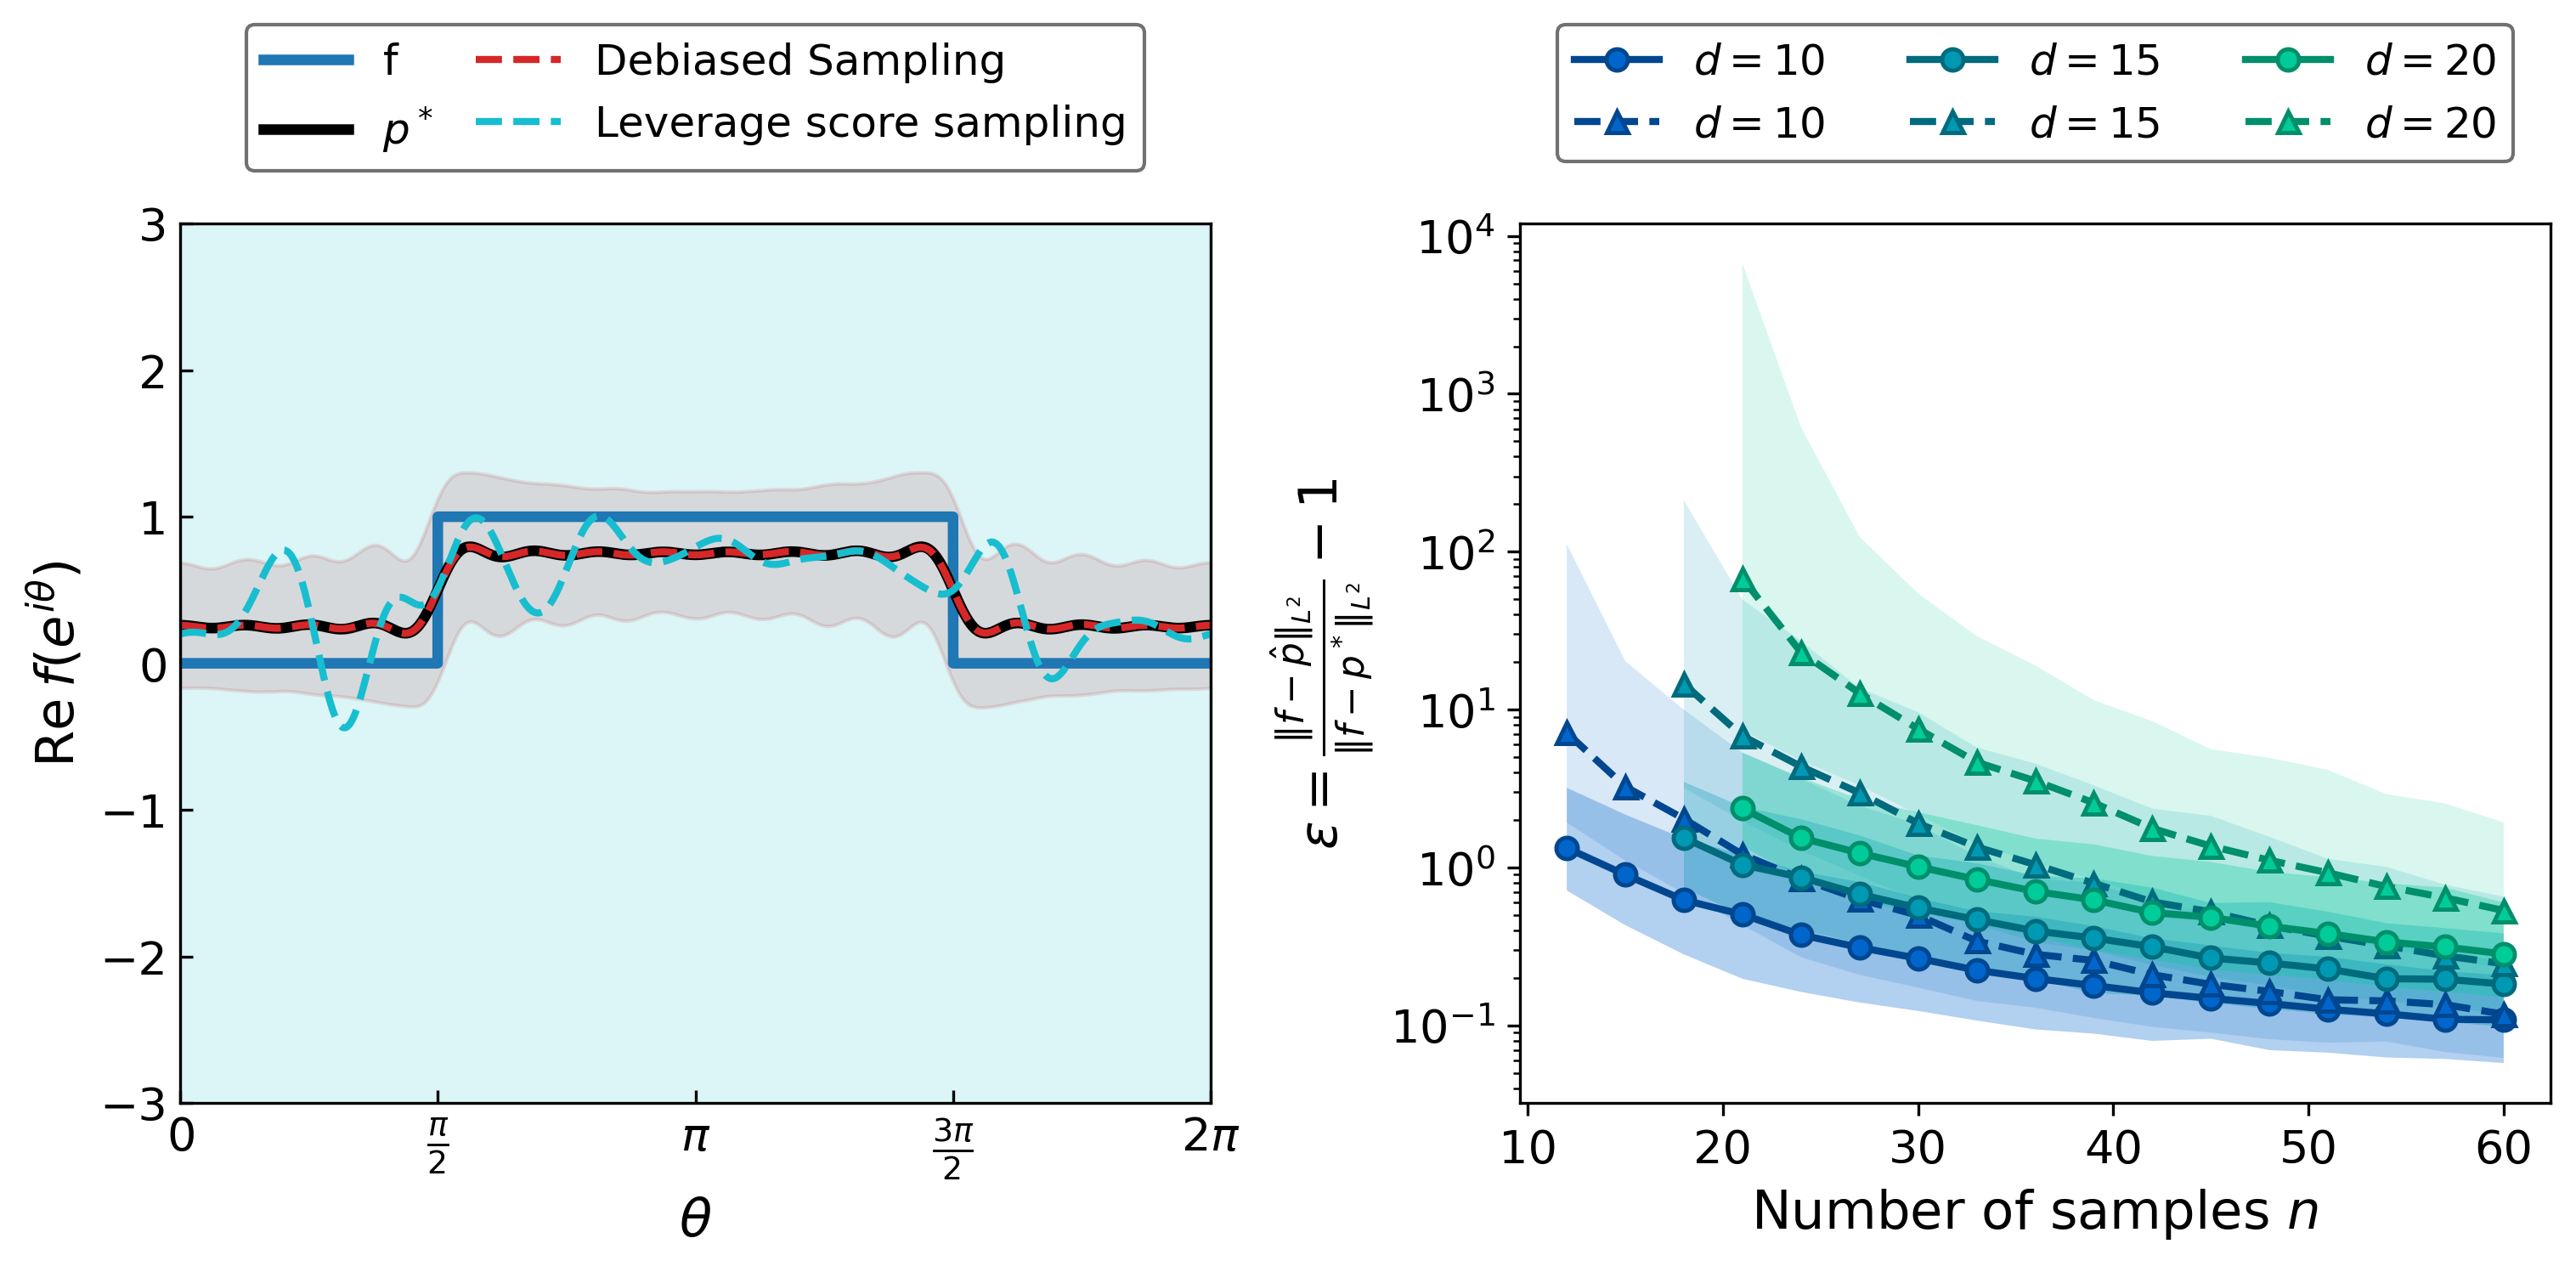

In [18]:
plot_figure2(res2_fourier,res4_fourier,"final_fourier",label_fontsize=15,
                       legend_fontsize=12,tick_fontsize=13, line_thickness=2)